In [1]:
import os
import time
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import gym

In [2]:
env_name = 'Breakout-v0'
env = gym.make(env_name)

In [3]:
from dqn_utils import *

In [4]:
dqn_memory = DQNMemory()

In [5]:
for _ in range(10):
    done = False
    state = env.reset()
    state = process_state(state)
    dqn_memory.start_eps(state)

    while not done:
        action = env.action_space.sample()
        observation = env.step(action)

        new_state, reward, done, info = observation

        new_state = process_state(new_state)
        # add new observation to `dqn_memory`
        dqn_memory.add(new_state, action, reward, done)

    dqn_memory.end_eps()

dqn_memory.get_current_size()

(2201, 2201, 2201, 2201)

In [6]:
state_list, action_list, reward_list, next_state_list = dqn_memory.sample_memory()

In [7]:
# state, action, reward, terminal = dqn_memory.get(3380)
# action, reward, terminal

In [8]:
[len(x) for x in (state_list, action_list, reward_list, next_state_list)]

[998, 998, 998, 998]

In [9]:
import IPython.display as display
from PIL import Image
import cv2

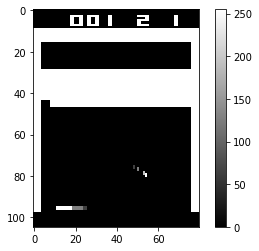

In [10]:
plt.imshow(state_list[0], cmap='gray')
plt.colorbar()

In [13]:
x = cv2.imencode('.png', state_list[0])[1].tostring()

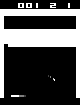

In [14]:
display.display(display.Image(x))

In [25]:
def show_sample(idx):
    state = state_list[idx]
    action = action_list[idx]
    reward = reward_list[idx]
    next_state = next_state_list[idx]
    
    print(action, reward)
    
    _state = cv2.resize(state, dsize=None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
    _next_state = cv2.resize(next_state, dsize=None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)

    state_png = cv2.imencode('.png', _state)[1].tostring()
    next_state_png = cv2.imencode('.png', _next_state)[1].tostring()

    display.display(display.Image(state_png))
    display.display(display.Image(next_state_png))

1 0.0


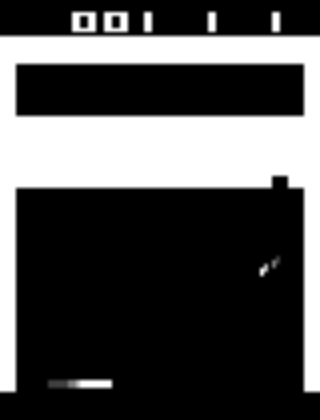

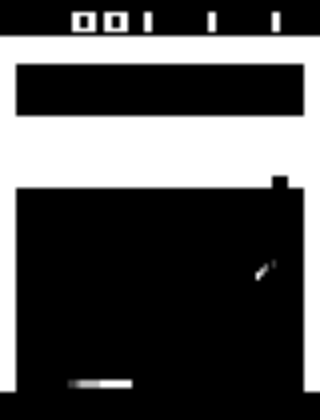

In [27]:
show_sample(3)

In [33]:
input_shape = (105, 80, 1)

batch = []
for state in state_list:
    # at this point `state.shape` == `(105, 80)`
    _state = np.reshape(state, input_shape)
    # `_state.shape` == `(105, 80, 1)`
    batch.append(_state)

for state in next_state_list:
    _state = np.reshape(state, input_shape)
    batch.append(_state)

batch = np.array(batch, dtype=np.float32) / 255.0
batch.shape

(1996, 105, 80, 1)

In [34]:
np.max(batch)

1.0

In [35]:
np.min(batch)

0.0

In [36]:
batch.dtype

dtype('float32')

In [38]:
assert len(state_list) == len(action_list) == len(reward_list) == len(next_state_list)